In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
mnist = tf.keras.datasets.mnist #Given dataset in tensorflow, handwriten 28x28 images of digits

In [5]:
#Prepare to split the data into training and testing sets
#60,000 training : 10,000 test
#x contains the images, y contains the labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()

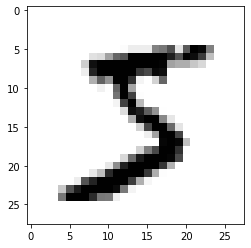

In [6]:
plt.imshow(x_train[0], cmap = plt.cm.binary) #Example Image

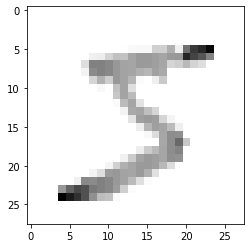

In [7]:
#Normalizing the data (could also divide by 255)
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary) #Normalized Image

In [8]:
#Resize data to be used
imageSize = 28
x_train_resized = np.array(x_train).reshape(-1, imageSize, imageSize, 1) #add an additional dimension
x_test_resized = np.array(x_test).reshape(-1, imageSize, imageSize, 1) #add an additional dimension

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [10]:
#Create Neural Network
model = tf.keras.Sequential()

#First Layer
model.add(Conv2D(64, (3,3), input_shape = x_train_resized.shape[1:])) #input layer size
model.add(Activation("relu")) #activation function, relu makes it nonlinear
model.add(MaxPooling2D(pool_size = (2,2)))

#Second Layer
model.add(Conv2D(64, (3,3))) #input layer size
model.add(Activation("relu")) #activation function, relu makes it nonlinear
model.add(MaxPooling2D(pool_size = (2,2)))

#Third Layer
model.add(Conv2D(64, (3,3))) #input layer size
model.add(Activation("relu")) #activation function, relu makes it nonlinear
model.add(MaxPooling2D(pool_size = (2,2)))

#First Connected Layer
model.add(Flatten()) #Turns 2D array to 1D value
model.add(Dense(64)) #64 neurons connected to previous layer
model.add(Activation("relu"))

#Second Connected Layer
model.add(Dense(32)) #32 neurons
model.add(Activation("relu"))

#Final Connected Layer
model.add(Dense(10)) #10 neurons for digits
model.add(Activation("softmax")) #softmax provides class probabilities
##To make it a binary classification, change the number of neurons to 1 and change the activation to sigmoid
#model.summary to show layer info

In [11]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [12]:
model.fit(x_train_resized, y_train, epochs = 5, validation_split = 0.3) #Training

Epoch 1/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.3533 - accuracy: 0.8880 - val_loss: 0.1314 - val_accuracy: 0.9588
Epoch 2/5
1313/1313 [==============================] - 24s 18ms/step - loss: 0.1122 - accuracy: 0.9660 - val_loss: 0.1034 - val_accuracy: 0.9693
Epoch 3/5
1313/1313 [==============================] - 24s 19ms/step - loss: 0.0807 - accuracy: 0.9752 - val_loss: 0.0822 - val_accuracy: 0.9766
Epoch 4/5
1313/1313 [==============================] - 24s 19ms/step - loss: 0.0623 - accuracy: 0.9809 - val_loss: 0.0753 - val_accuracy: 0.9768
Epoch 5/5
1313/1313 [==============================] - 24s 19ms/step - loss: 0.0484 - accuracy: 0.9841 - val_loss: 0.0730 - val_accuracy: 0.9784


In [13]:
test_loss, test_acc = model.evaluate(x_test_resized, y_test)
print("Test loss on validation dataset: ", test_loss)
print("Test accuracy on validation dataset: ",test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0668 - accuracy: 0.9792
Test loss on validation dataset:  0.06678814440965652
Test accuracy on validation dataset:  0.979200005531311


In [14]:
#Predict using test data
predictions = model.predict([x_test_resized])

Predicted digit for first image:  7


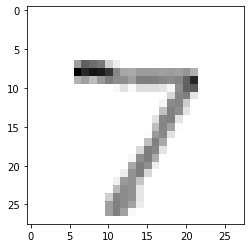

In [18]:
#Using the first image as an example, print the most likely digit based on probabilities
print("Predicted digit for first image: ", np.argmax(predictions[0]))
plt.imshow(x_test[0], cmap = plt.cm.binary)

In [19]:
import cv2

In [20]:
image = cv2.imread('four.png')

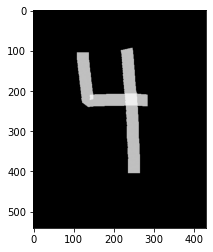

In [22]:
plt.imshow(image) #Image I handrew in paint before resizing

In [23]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert from color image
image_resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA) #resize image

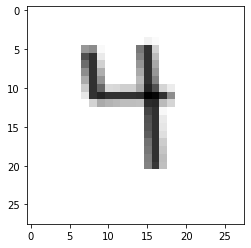

In [26]:
plt.imshow(image_resized, cmap = plt.cm.binary) #Image after resizing

In [27]:
#Prepare the image to be used in the CNN
pred_image = tf.keras.utils.normalize(image_resized, axis = 1) #normalization
pred_image = np.array(pred_image).reshape(-1, imageSize, imageSize, 1) #add dimension

In [28]:
#Predict new image
predictDigit = model.predict(pred_image)
print("Predicted digit for drawn image: ", np.argmax(predictDigit))

Predicted digit for drawn image:  4
